```bash
## TO RUN THIS NOTEBOOK FROM THE TERMINAL
$ jupyter nbconvert --to script x10_classifier_pipeline.ipynb
$ python x10_classifier_pipeline.py
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import kernels, GaussianProcessClassifier

### Common libraries

In [2]:
import pipeline as pl
from model import plotlib

In [3]:
from model.AdData import *
from model.AdFeatures import *
from model.AdClassify import TestPerformance
from model import hyperparams

### Initialize

In [7]:
plotlib.load_fonts("../../../common/fonts/")
plt.style.use("matplotlib.mplstyle")

inputCsv = "../Data/imputed_data.mice.csv"
ignoreXCols = ['imp', 'id', 'quality', 'lobe', 'full', 'other', 'coatingId']

In [8]:
loader = LoadData()
loader.Execute(inputCsv)

 -- LoadData() ... 
	 Add coating classes: ['full', 'other', 'lobe']
	 Test IDs: [16, 6, 3, 26, 9, 27]
	 Test classes: ['full', 'full', 'other', 'lobe', 'lobe', 'full']



xCols: []

In [19]:
plotQuality = pl.PlotFrequency('quality')
plotClasses = pl.PlotFrequency('coatingId')

### Define grid pipeline

In [20]:
grid = [
    loader,
    (
        ObservedData(),
        ImputedData()
    ),
    pl.SetYCol('coatingId'),
    pl.Set(scoring='f1_weighted'),
    pl.DropCol('coating'),
    (
        pl.AllValidFeatures(ignoreCols=ignoreXCols),
        pl.NonCollinearFeatures(keepCols=['teosVolPct', 'teosVolume'],
                             ignoreCols=ignoreXCols, show=False),
    ),
    pl.AugmentByQuality(F=2, scale=0.3, qcol='quality'),
    (
        None,
        pl.AugmentImb(RandomOverSampler()),
        pl.AugmentImb(BorderlineSMOTE()),
        pl.AugmentImb(SMOTE()),
        pl.AugmentImb(ADASYN()),
    ),
    plotQuality,
    plotClasses,
    AggregateFeatures(show=False),
    pl.ScaleX(allColumns=False),
    (
        # SetModel(RandomForestClassifier()),
        pl.SetModel(DecisionTreeClassifier()),
    ),
    (
        None,
        pl.SelectFeaturesRFE(show=True)
    ),
    (
        # SetModel(XGBClassifier()),
        pl.SetModel(KNeighborsClassifier()),
        # SetModel(SVC()),
        # SetModel(GaussianProcessClassifier()),
        # SetModel(RandomForestClassifier()),
    ),
    pl.SearchHyperParams(hyperparams.space),
    TestPerformance(show=True)
]

Pipeline 01:
=============================== >>
 -- LoadData() ... ok
 -- ObservedData() ... ok
 -- SetYCol() ... 'coatingId' ok
 -- Set: scoring ... 
	 {'scoring': 'f1_weighted'}

 -- DropCol() ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=2 scale=0.30 ... 
	 Old shape: (16, 21), New shape: (137, 21)

 -- PlotFrequency() ... 

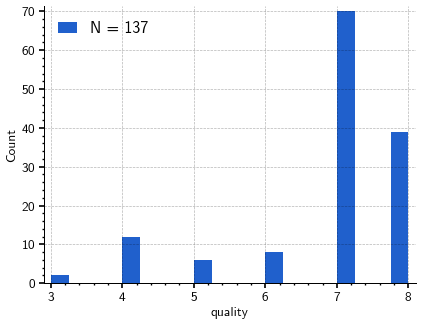

ok
 -- PlotFrequency() ... 

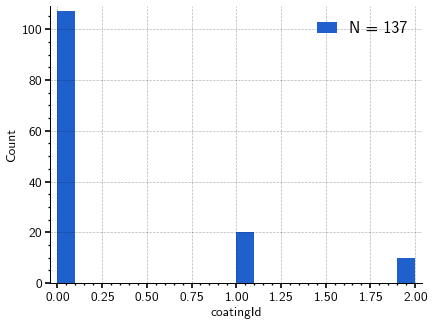

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

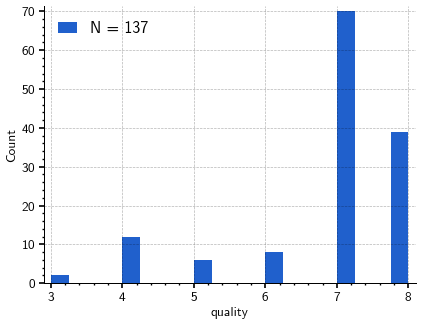

ok
 -- PlotFrequency() ... 

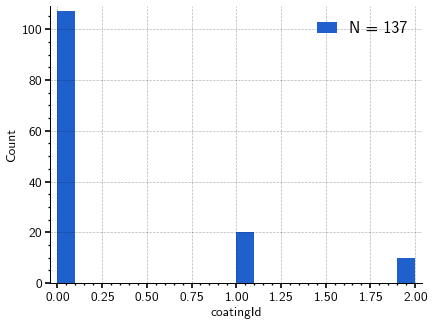

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tsfw2', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=9, weights='distance').
	 Best score: 0.9051132328572556

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1  

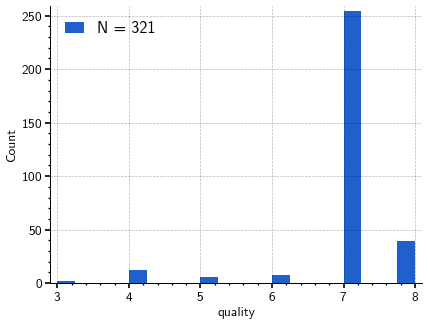

ok
 -- PlotFrequency() ... 

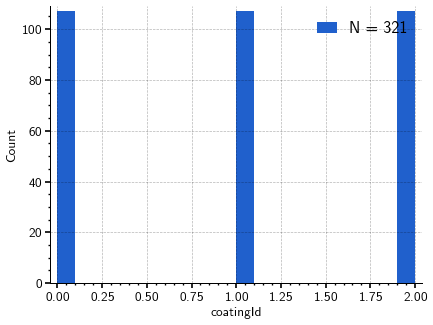

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg 

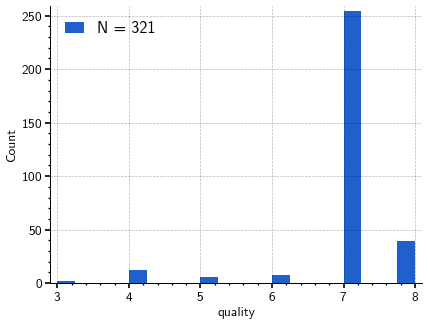

ok
 -- PlotFrequency() ... 

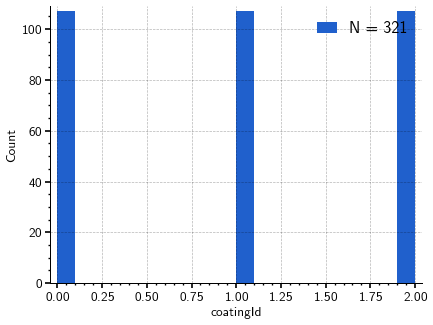

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 6 features.
	 ['lsfw1', 'tsfw2', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0

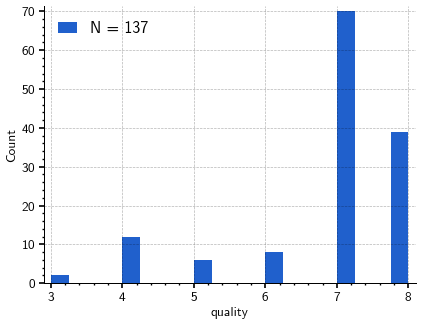

ok
 -- PlotFrequency() ... 

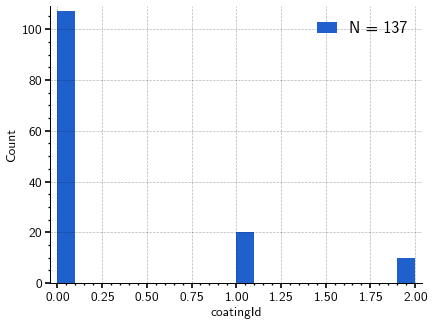

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

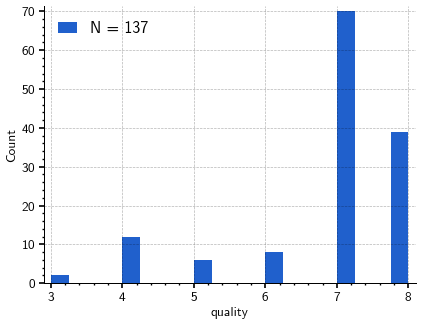

ok
 -- PlotFrequency() ... 

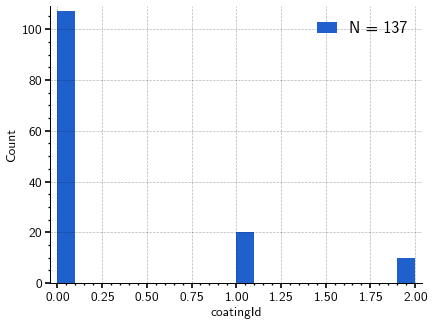

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 7 features.
	 ['tsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=9, weights='distance').
	 Best score: 0.9111653078491693

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      1.00      0.67         

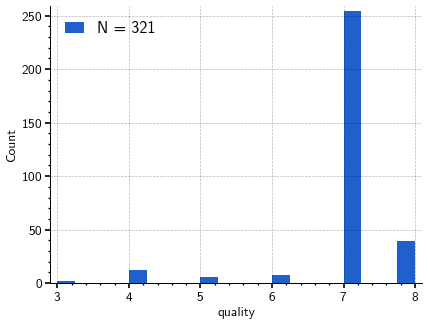

ok
 -- PlotFrequency() ... 

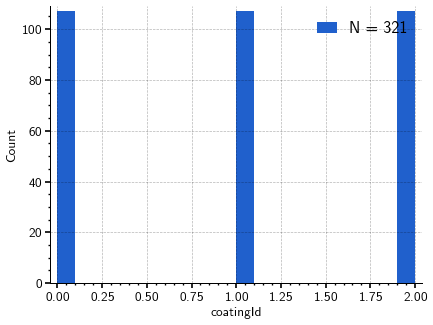

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg 

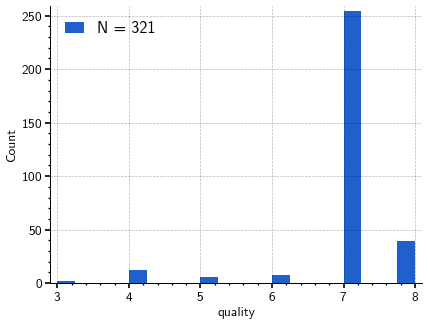

ok
 -- PlotFrequency() ... 

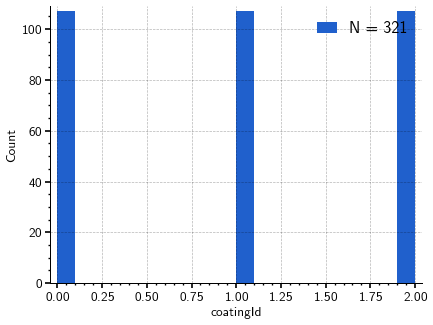

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tsfw2', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      

Traceback (most recent call last):
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 119, in _pipeline
    X = adapter.Execute(X, i+1, self.muted)
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 78, in Execute
    X = self.Process(X)
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/AdAugment.py", line 23, in Process
    Xs, ys = self.overSampler.fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 88, in fit_resample
    output = self._fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py", line 183, in _fit_resample
    raise RuntimeError(
RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by z


	 Old shape: (16, 21), New shape: (137, 21)

 -- AugmentImb: ADASYN ... L10 FAILED: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.
Done 10.

Pipeline 11:
=============================== >>
 -- LoadData() ... ok
 -- ObservedData() ... ok
 -- SetYCol() ... 'coatingId' ok
 -- Set: scoring ... 
	 {'scoring': 'f1_weighted'}

 -- DropCol() ... ok
 -- NonCollinearFeatures() ... 
	 Selected 9 features.

 -- AugmentByQuality: F=2 scale=0.30 ... 

Traceback (most recent call last):
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 119, in _pipeline
    X = adapter.Execute(X, i+1, self.muted)
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 78, in Execute
    X = self.Process(X)
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/AdAugment.py", line 23, in Process
    Xs, ys = self.overSampler.fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 88, in fit_resample
    output = self._fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py", line 183, in _fit_resample
    raise RuntimeError(
RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by z


	 Old shape: (16, 21), New shape: (137, 21)

 -- PlotFrequency() ... 

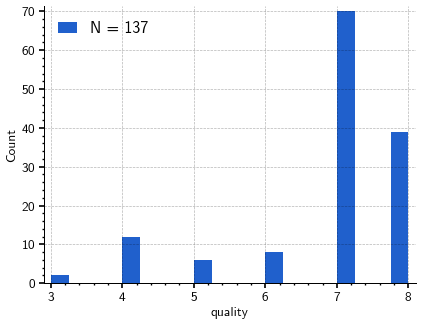

ok
 -- PlotFrequency() ... 

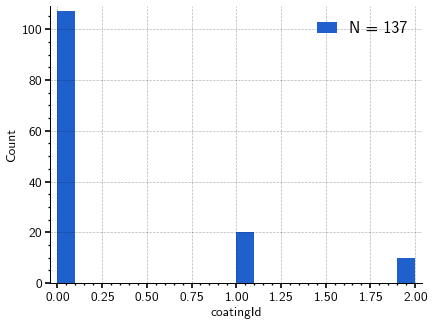

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

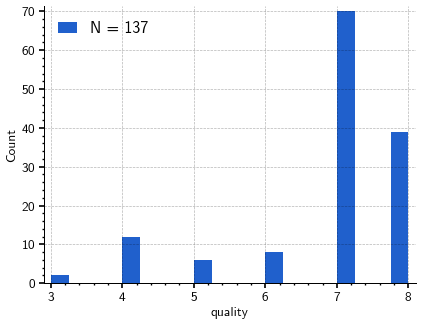

ok
 -- PlotFrequency() ... 

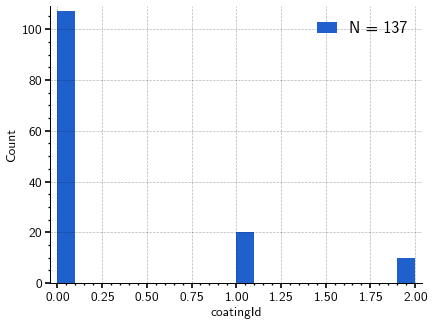

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['lsfw1', 'tsfw2', 'tsfw1', 'teosVolPct', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      

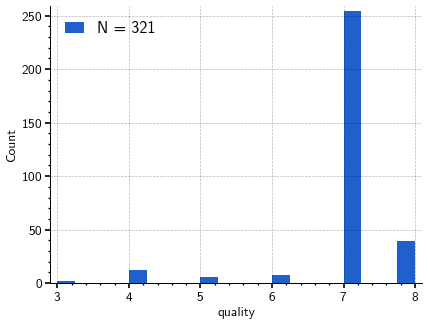

ok
 -- PlotFrequency() ... 

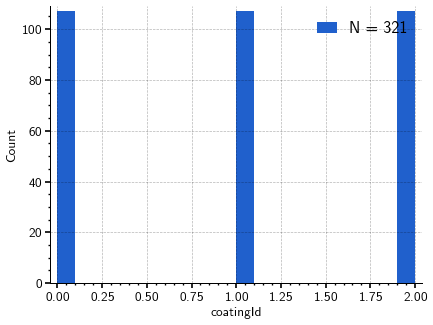

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

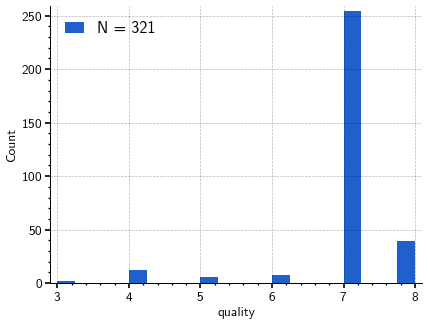

ok
 -- PlotFrequency() ... 

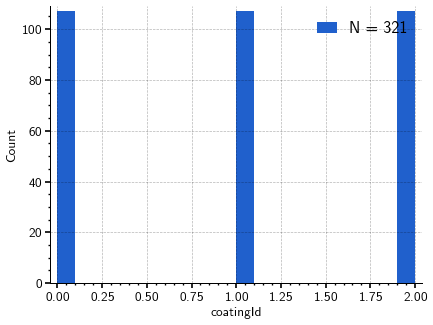

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tspk2', 'tsfw2', 'lspk1', 'teosVolPct', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      

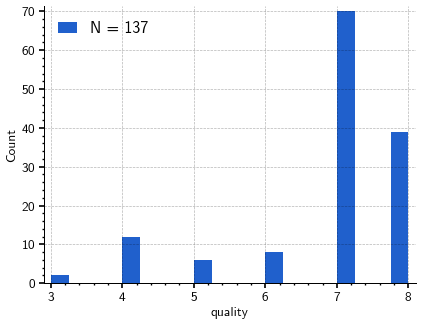

ok
 -- PlotFrequency() ... 

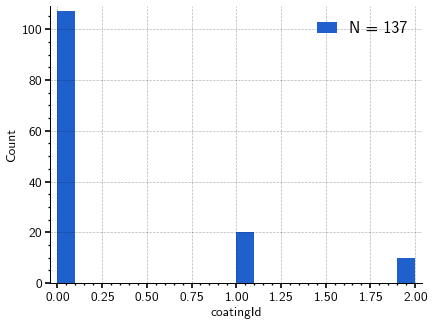

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

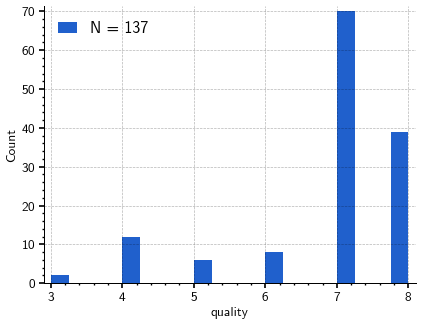

ok
 -- PlotFrequency() ... 

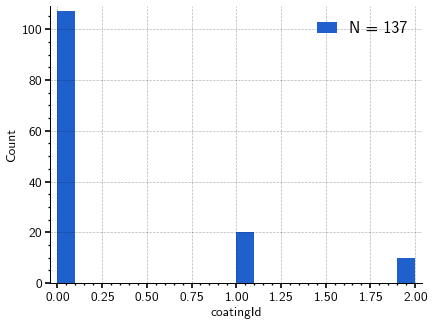

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 7 features.
	 ['tspk2', 'tspk1', 'tsfw2', 'tsfw1', 'lspk1', 'teosVolPct', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8915508521399125

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            

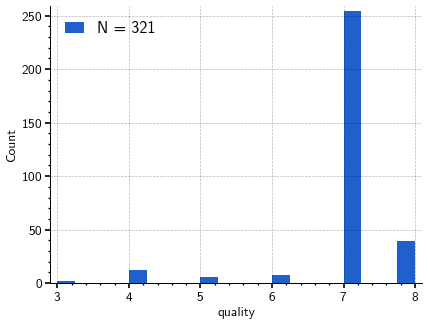

ok
 -- PlotFrequency() ... 

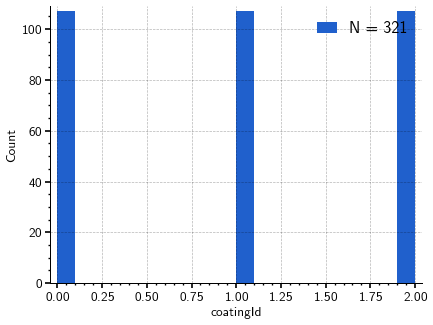

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.60      1.00      0.75         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.50         6
	    macro avg 

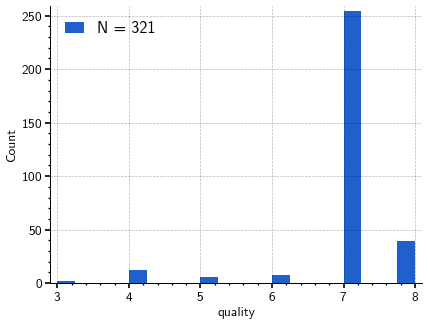

ok
 -- PlotFrequency() ... 

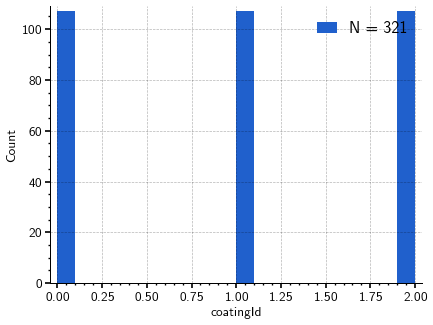

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 3-fold CV with DecisionTreeClassifier() selected 6 features.
	 ['tspk2', 'tspk1', 'tsfw2', 'lspk1', 'teosVolPct', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 3-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9439137781256862

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0

Traceback (most recent call last):
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 119, in _pipeline
    try:
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 78, in Execute
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/AdAugment.py", line 23, in Process
    Xs, ys = self.overSampler.fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 88, in fit_resample
    output = self._fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py", line 183, in _fit_resample
    raise RuntimeError(
RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SM


	 Old shape: (16, 21), New shape: (137, 21)

 -- AugmentImb: ADASYN ... L20 FAILED: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.
Done 20.

Pipeline 21:
=============================== >>
 -- LoadData() ... ok
 -- ImputedData() ... ok
 -- SetYCol() ... 'coatingId' ok
 -- Set: scoring ... 
	 {'scoring': 'f1_weighted'}

 -- DropCol() ... ok
 -- AllValidFeatures() ... 
	 Selected 14 features.

 -- AugmentByQuality: F=2 scale=0.30 ... 

Traceback (most recent call last):
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 119, in _pipeline
    try:
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/pipeline.py", line 78, in Execute
  File "/home/hdd/Dropbox/work-Proj/Proj-UV-GNR-ML/code/pipeline/AdAugment.py", line 23, in Process
    Xs, ys = self.overSampler.fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/base.py", line 88, in fit_resample
    output = self._fit_resample(X, y)
  File "/home/akhlak/miniconda3/lib/python3.9/site-packages/imblearn/over_sampling/_adasyn.py", line 183, in _fit_resample
    raise RuntimeError(
RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SM


	 Old shape: (120, 21), New shape: (815, 21)

 -- PlotFrequency() ... 

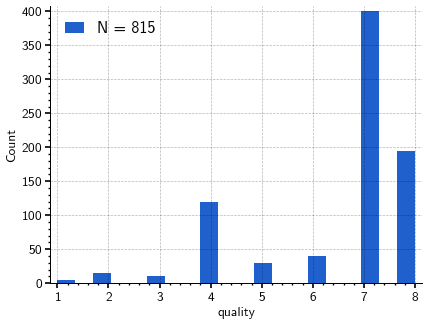

ok
 -- PlotFrequency() ... 

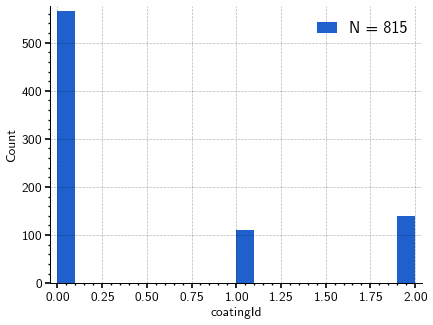

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.9798423852902381

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg      

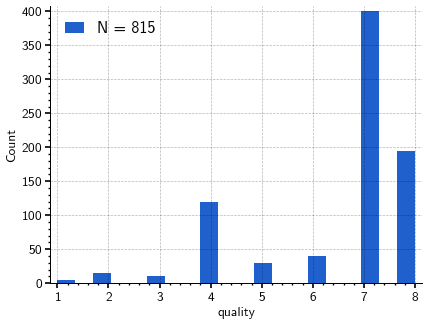

ok
 -- PlotFrequency() ... 

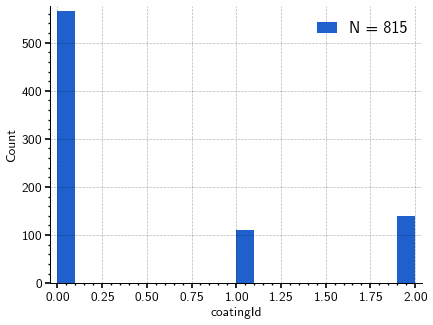

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tspk2', 'tsfw2', 'lsfw2', 'lsfw3', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1).
	 Best score: 0.9794471005007737

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      1.00      0.67         3
	            1       0.00      0.00      0.00         1


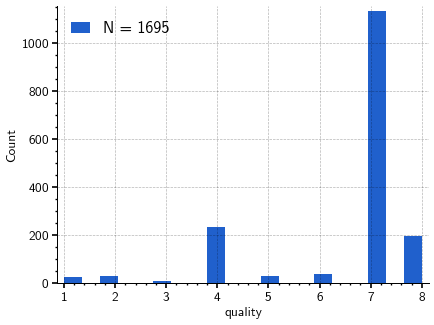

ok
 -- PlotFrequency() ... 

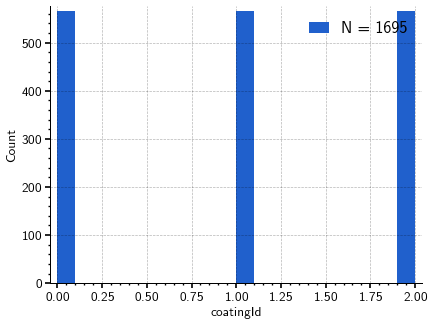

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.995256969833002

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg       

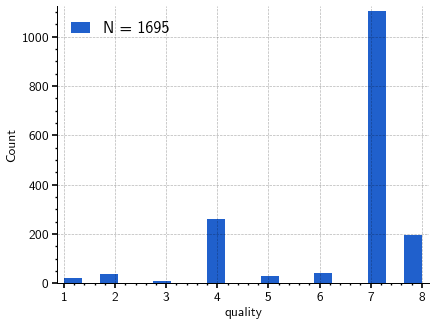

ok
 -- PlotFrequency() ... 

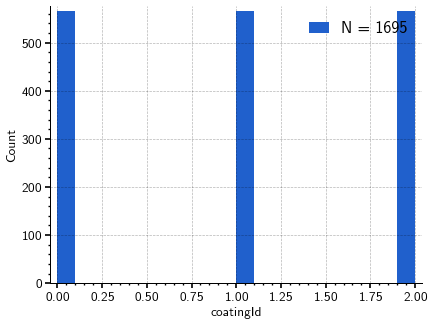

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 14 features.
	 ['tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9958512782914157

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	    

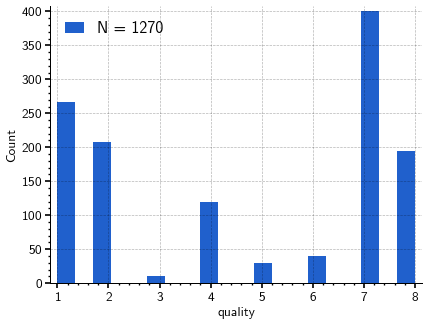

ok
 -- PlotFrequency() ... 

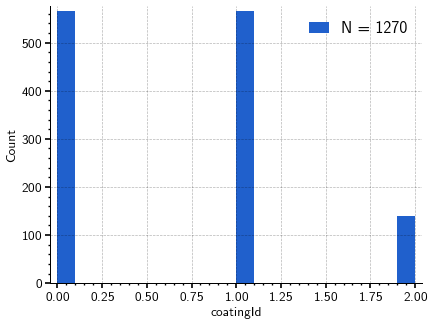

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8970893920391612

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.33      0.33      0.33         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.17         6
	    macro avg 

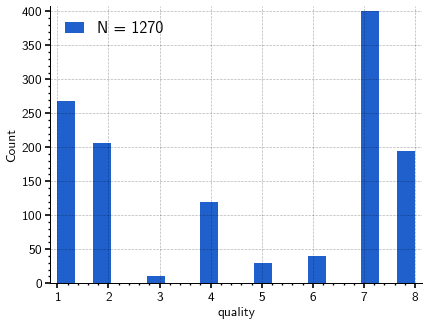

ok
 -- PlotFrequency() ... 

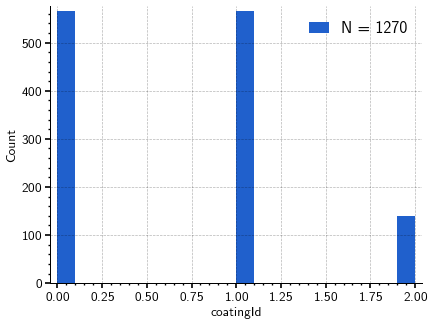

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 8 features.
	 ['tsfw1', 'tspk2', 'tsfw2', 'lsfw2', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8975622233250778

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	   

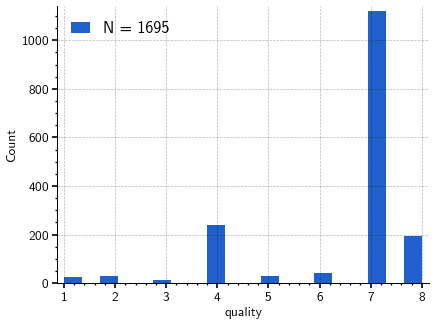

ok
 -- PlotFrequency() ... 

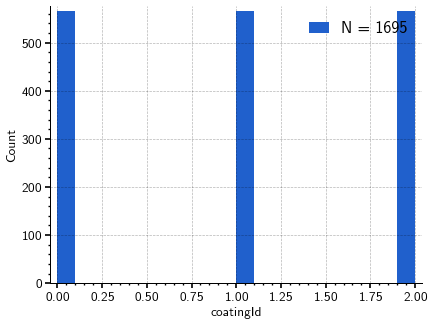

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.995256969833002

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg       

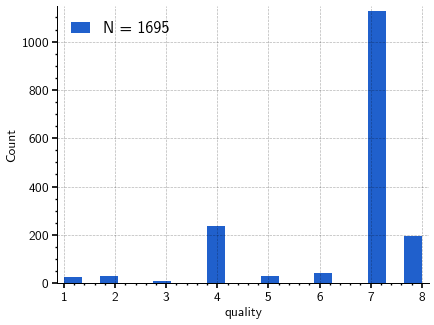

ok
 -- PlotFrequency() ... 

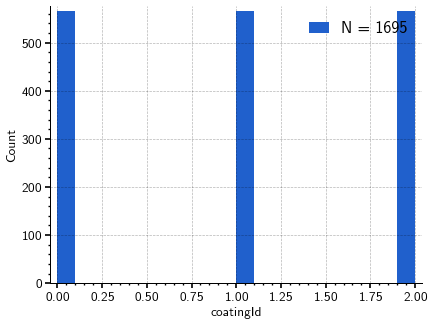

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 12 features.
	 ['tsfw1', 'lspk1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.9958662407483618

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50   

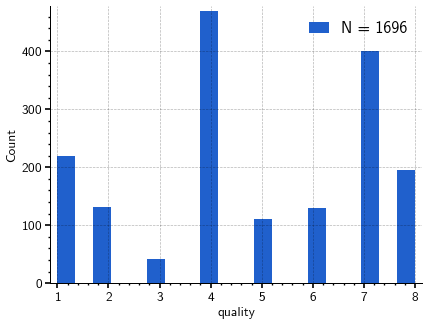

ok
 -- PlotFrequency() ... 

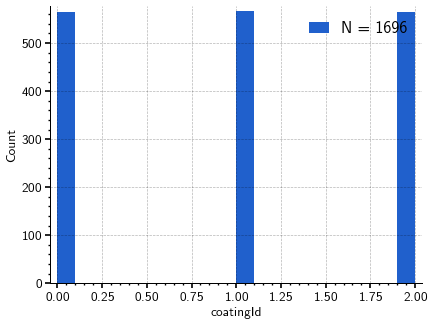

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9964555751637694

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.00      0.00      0.00       3.0
	            1       0.00      0.00      0.00       1.0
	            2       0.00      0.00      0.00       2.0
	 
	     accuracy                           0.00       6.0
	    macro avg 

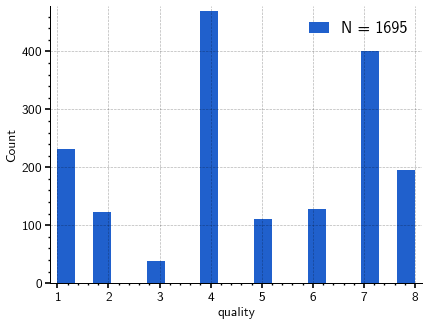

ok
 -- PlotFrequency() ... 

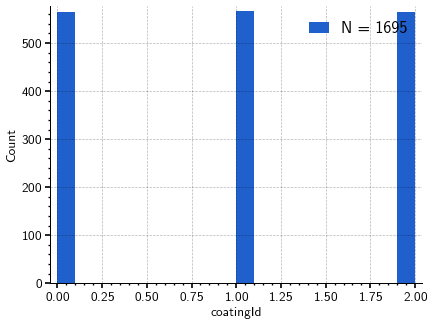

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 6 features.
	 ['tspk1', 'tspk2', 'lspk2', 'lspk3', 'lsfw3', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=7, p=1,
	                      weights='distance').
	 Best score: 0.9970336037491133

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.00      0.00     

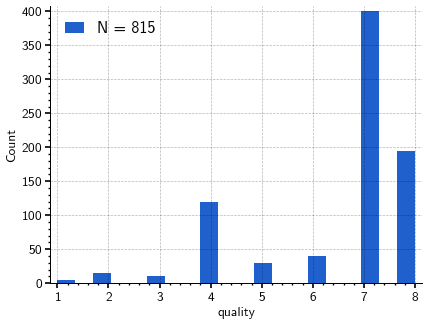

ok
 -- PlotFrequency() ... 

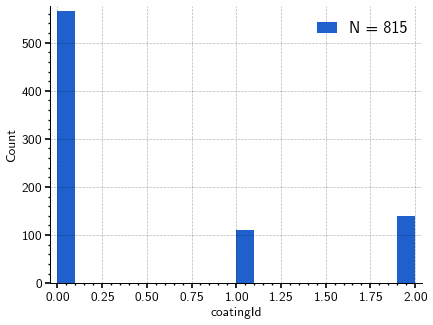

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.9782662423586277

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg      

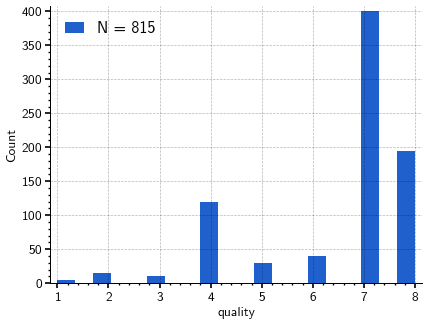

ok
 -- PlotFrequency() ... 

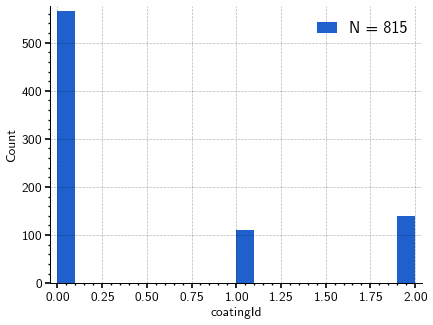

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 12 features.
	 ['tsfw2', 'lspk1', 'tspk2', 'tspk3', 'lspk2', 'lspk3', 'tsfw1', 'tsfw3', 'lsfw1', 'tspk1', 'teosVolPct', 'teosVolume']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.9782662423586277

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.33   

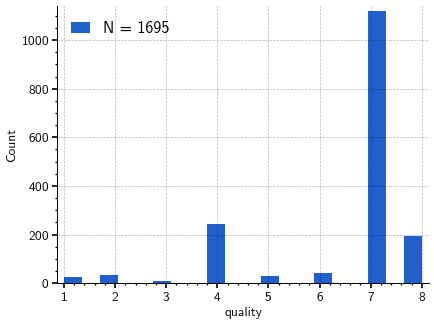

ok
 -- PlotFrequency() ... 

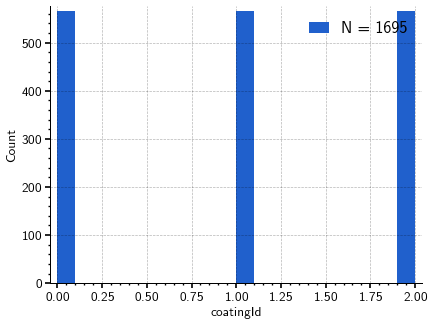

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.9958512782914157

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg 

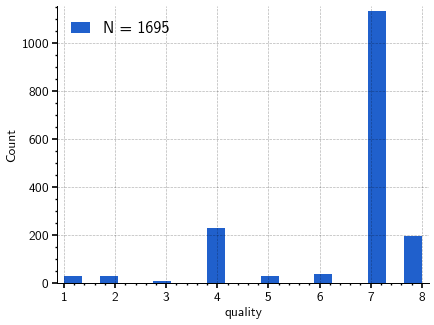

ok
 -- PlotFrequency() ... 

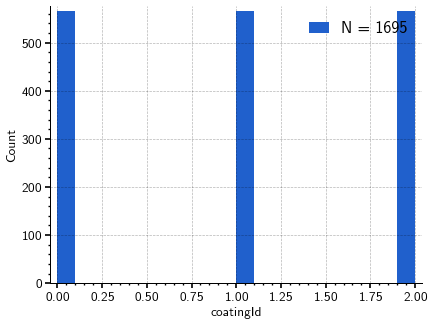

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tsfw2', 'tspk2', 'lspk2', 'lspk3', 'tsfw1']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1).
	 Best score: 0.9976317505971432

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00 

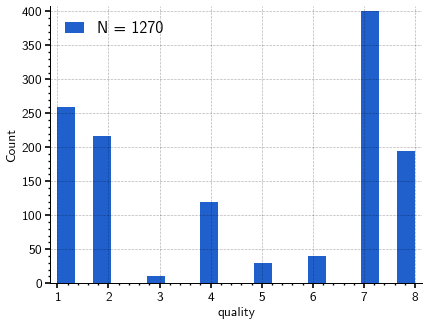

ok
 -- PlotFrequency() ... 

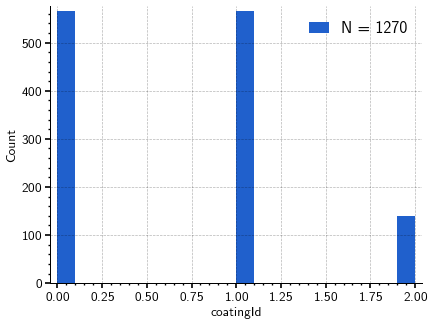

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 
	 5-fold CV HyperParam search for KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=1, p=1).
	 Best score: 0.8977767975575635

 -- TestPerformance() ... 
                        result
100% accuracy            False
5/6 accuracy             False
100% accuracy on lobe    False
80% accuracy on lobe     False
100% accuracy on full    False
80% accuracy on full     False
100% accuracy on other   False
80% accuracy on other    False

	 SCORE: 0
	               precision    recall  f1-score   support
	 
	            0       0.50      0.67      0.57         3
	            1       0.00      0.00      0.00         1
	            2       0.00      0.00      0.00         2
	 
	     accuracy                           0.33         6
	    macro avg 

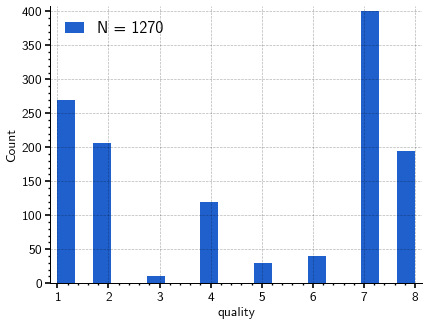

ok
 -- PlotFrequency() ... 

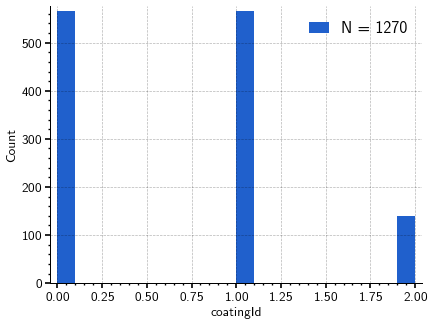

ok
 -- AggregateFeatures() ... ok
 -- ScaleX: StandardScaler ... 
	 Scaled xCols, non xCols are unchanged.

 -- SetModel: DecisionTreeClassifier ... ok
 -- SelectFeaturesRFE() ... 
	 RFE 5-fold CV with DecisionTreeClassifier() selected 5 features.
	 ['tsfw2', 'tspk2', 'lspk2', 'lspk3', 'tsfw1']

 -- SetModel: KNeighborsClassifier ... ok
 -- SearchHyperParams() ... running grid search ... 

In [ ]:
pipe = pipeline.GridLine(grid)
pipe.Execute(inputCsv)

In [10]:
res = pipe.Summarize()
print(res)
try:
    res.to_csv("gridline_results.csv")
except:
    input("Please close the excel file if open and press enter ...")
    res.to_csv("gridline_results.csv")
    print("Saved")

    score model xcols       S01           S02      S03           S04      S05  \
L01     0  None        LoadData  ObservedData  SetYCol  Set: scoring  DropCol   
L02     0  None        LoadData  ObservedData  SetYCol  Set: scoring  DropCol   
L23     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L24     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L25     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L26     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L27     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L28     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L29     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L30     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L31     0  None        LoadData   ImputedData  SetYCol  Set: scoring  DropCol   
L32     0  None        LoadD

In [ ]:
class get_ipython:
    def system(*args):
        pass

```bash
## RUN THIS NOTEBOOK FROM THE TERMINAL
$ jupyter nbconvert --to script PlayGround.ipynb
$ python PlayGround.py
```